In [1]:
import mdtraj as md
import numpy as np
import time
import math
import datetime
import sys
sys.path.insert(1, '/home/adria/scripts/lammps/utils/')
import conversion
import calc
import matplotlib.pyplot as plt
import os
from numba import jit
import altair as alt
from vega_datasets import data

In [2]:
traj_path = '/home/adria/perdiux/prod/lammps/dignon/trash/I_cpeb4/0.487/hps_traj.xtc'
topo = '/home/adria/perdiux/prod/lammps/dignon/trash/I_cpeb4/0.487/hps_trj.pdb'
traj = md.load(traj_path, top=topo)
traj = traj[7000:10000]

In [3]:
@jit(nopython=True)
def contact_calc(natoms, positions):
    dij = np.zeros(shape=(natoms,natoms))
    for i in range(natoms):
        for j in range(natoms):
            d = 0
            for r in range(3):
                d += (positions[0,i,r] - positions[0,j,r])**2
            dij[i,j] = d
    return dij

In [4]:
dframe = []
for frame in range(traj.n_frames):
    tframe = traj[frame]
    dijf = contact_calc(tframe.n_atoms, tframe.xyz)
    dframe.append(dijf)
dframe = np.array(dframe)

In [5]:
avg = dframe.mean(0)

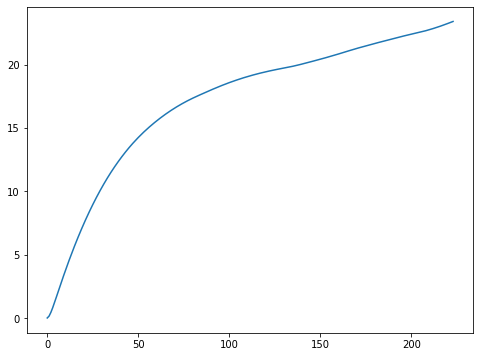

In [6]:
means = []
ijs = []
plt.figure(num=None, figsize=(8,6))
for d in range(int((avg.shape[0]+1)/2)):
    a = np.diagonal(avg, offset=int(d))
    means.append(a.mean())
    ijs.append(d)

plt.plot(ijs,means)

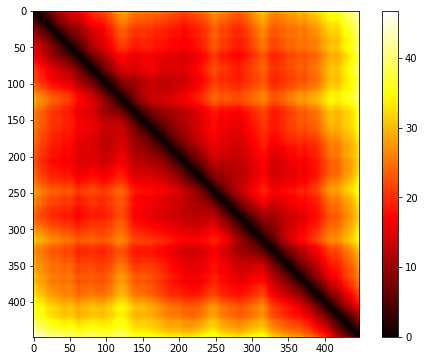

In [7]:
plt.figure(num=None, figsize=(8,6))
plt.imshow(avg, cmap='hot', interpolation='nearest')
plt.colorbar();